# core

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
%load_ext autoreload
%autoreload 1
%config InlineBackend.figure_format = 'retina'
%load_ext rich
import datetime
import hashlib
import json
import os
import re
import sys
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter
from pandas.plotting import register_matplotlib_converters
from scipy.stats import norm

register_matplotlib_converters()
import seaborn as sns
from IPython.display import Markdown, display

sns.set()
sns.set_context("poster", font_scale=1.3)
plt.rcParams["figure.figsize"] = 10, 6
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.precision = 4
warnings.simplefilter(action="ignore", category=FutureWarning)

# Data

In [ ]:
all_countries = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-12/all_countries.csv')
country_regions = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-12/country_regions.csv')
global_human_day = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-12/global_human_day.csv')
global_economic_day = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-09-12/global_economic_activity.csv')

In [ ]:
all_countries.head()

,Category,Subcategory,country_iso3,region_code,population,hoursPerDayCombined,uncertaintyCombined
0,Food provision,Food preparation,ABW,AM_C,101665,1.47,0.2376
1,Food provision,Food growth & collection,ABW,AM_C,101665,0.17,0.0269
2,Food provision,Food processing,ABW,AM_C,101665,0.00,0.0075
3,Nonfood provision,Materials,ABW,AM_C,101665,0.03,0.0021
4,Nonfood provision,Energy,ABW,AM_C,101665,0.05,0.0036


In [ ]:
all_countries.shape

(4776, 7)

# Plots

## Subcategory percent time spent per category

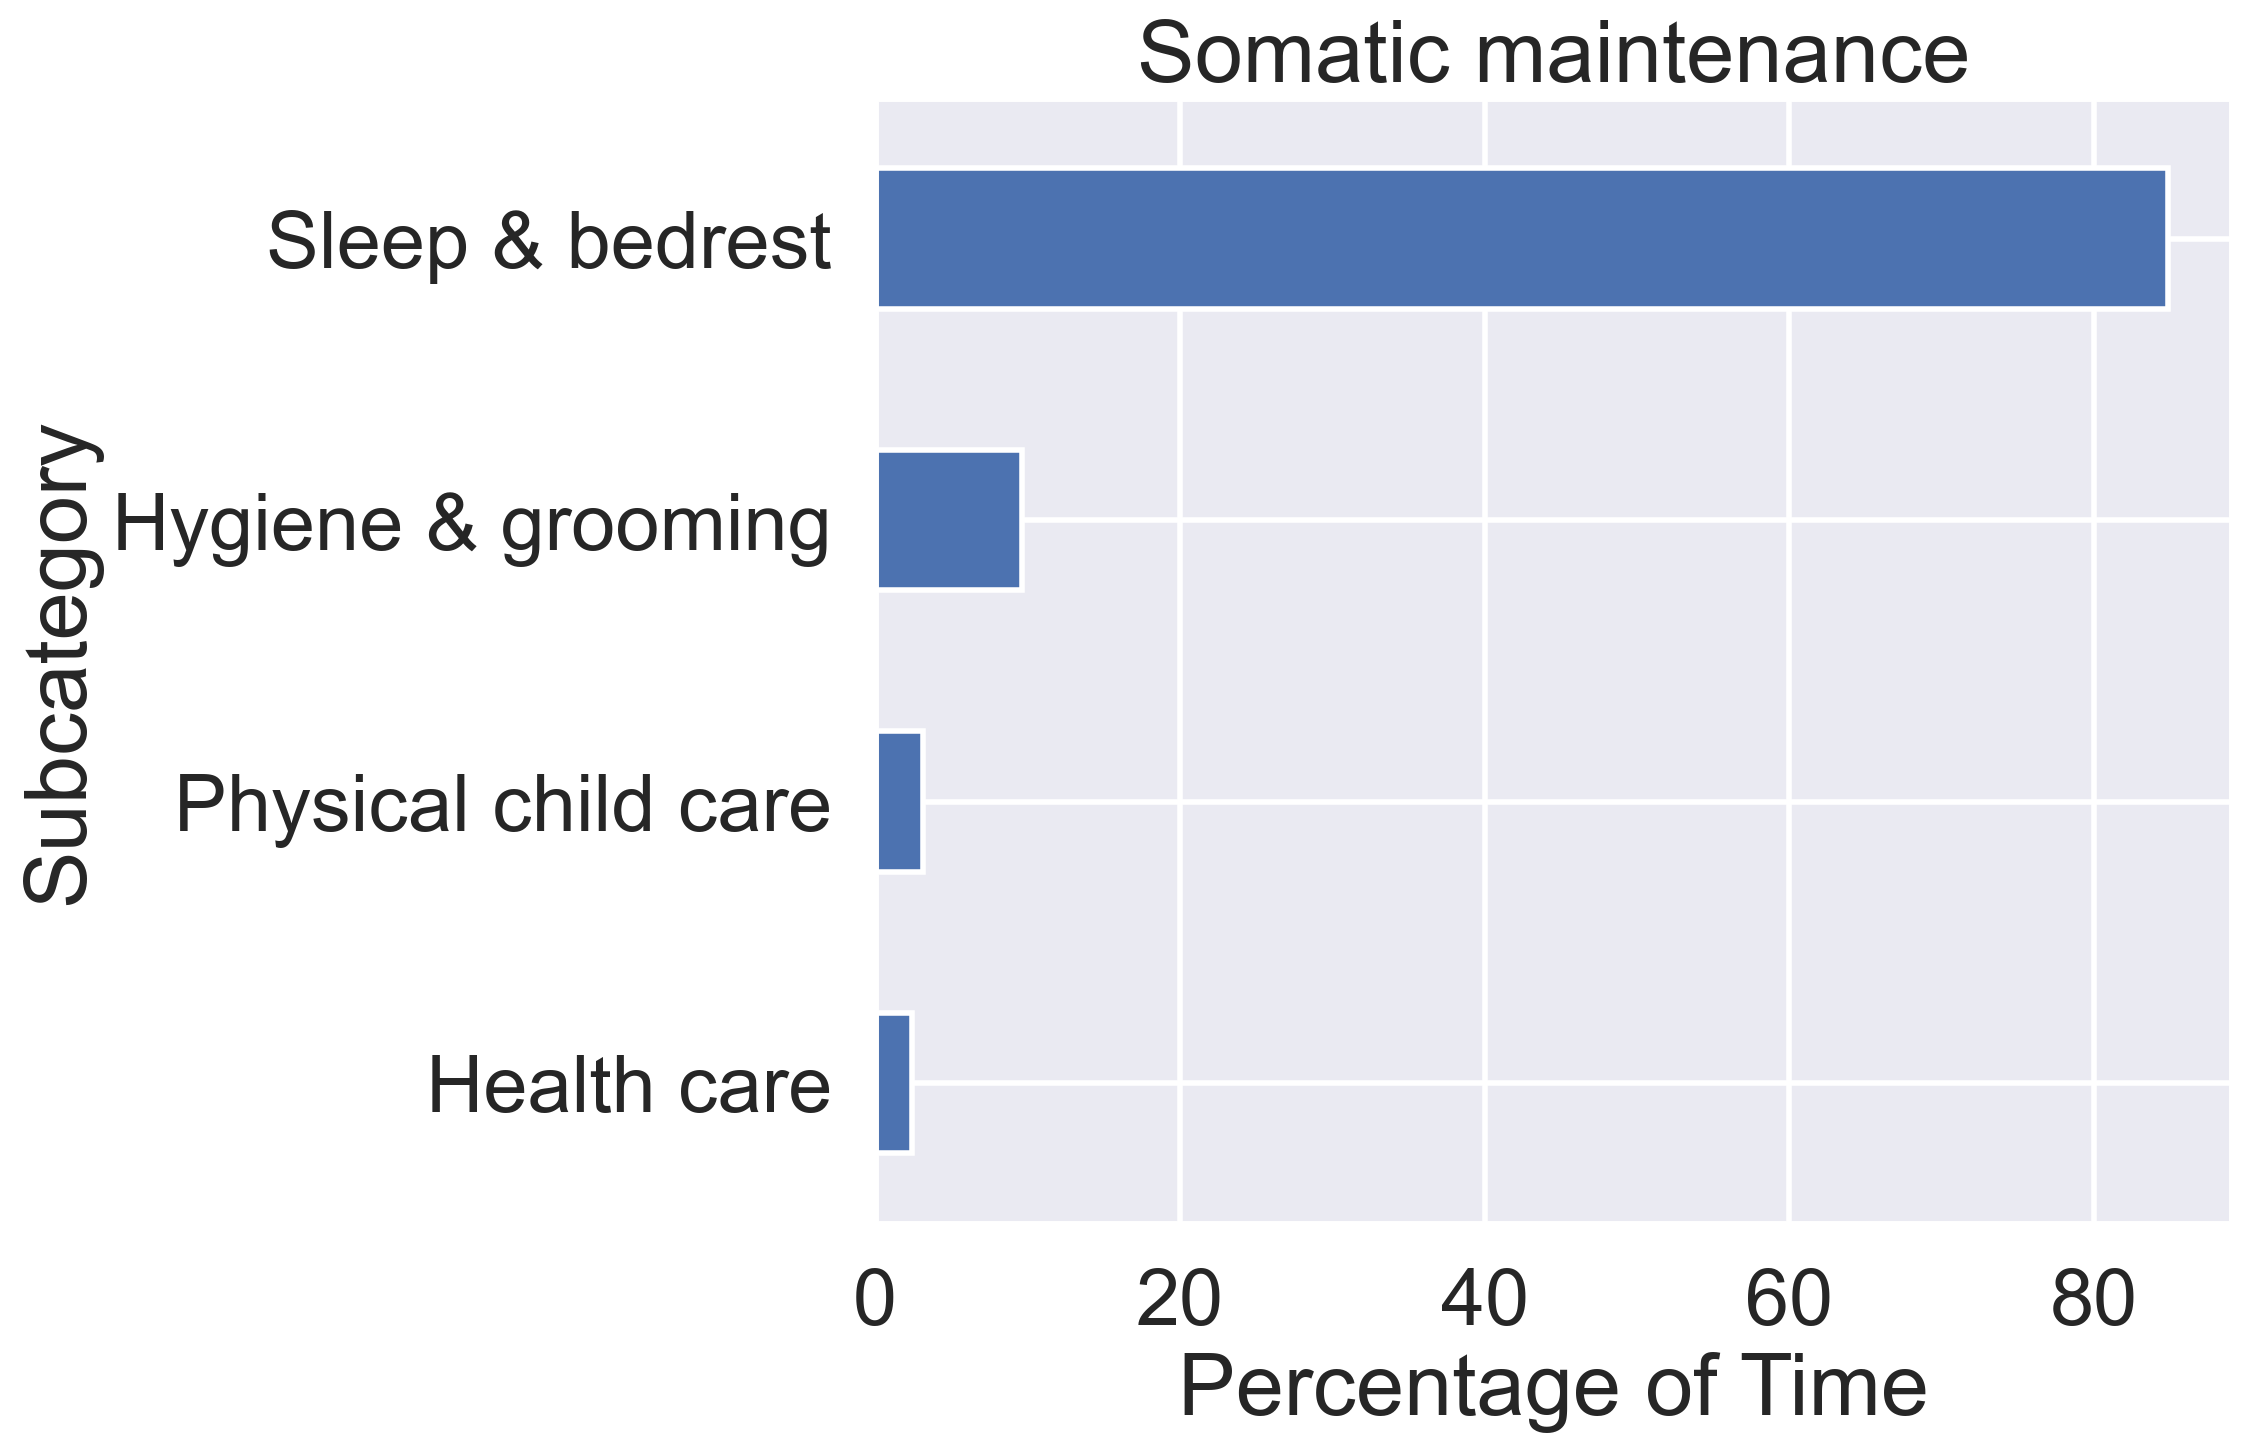

In [ ]:
category = all_countries.groupby(['Category'])['hoursPerDayCombined'].sum().idxmax()
plotser = all_countries[all_countries['Category'] == category].groupby(['Subcategory'])['hoursPerDayCombined'].sum()
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('w')
(100 * plotser.sort_values() / plotser.sum()).plot.barh(ax=ax)
ax.set_title(category)
ax.set_xlabel("Percentage of Time")
fig.tight_layout()

## Category percent time spent per day

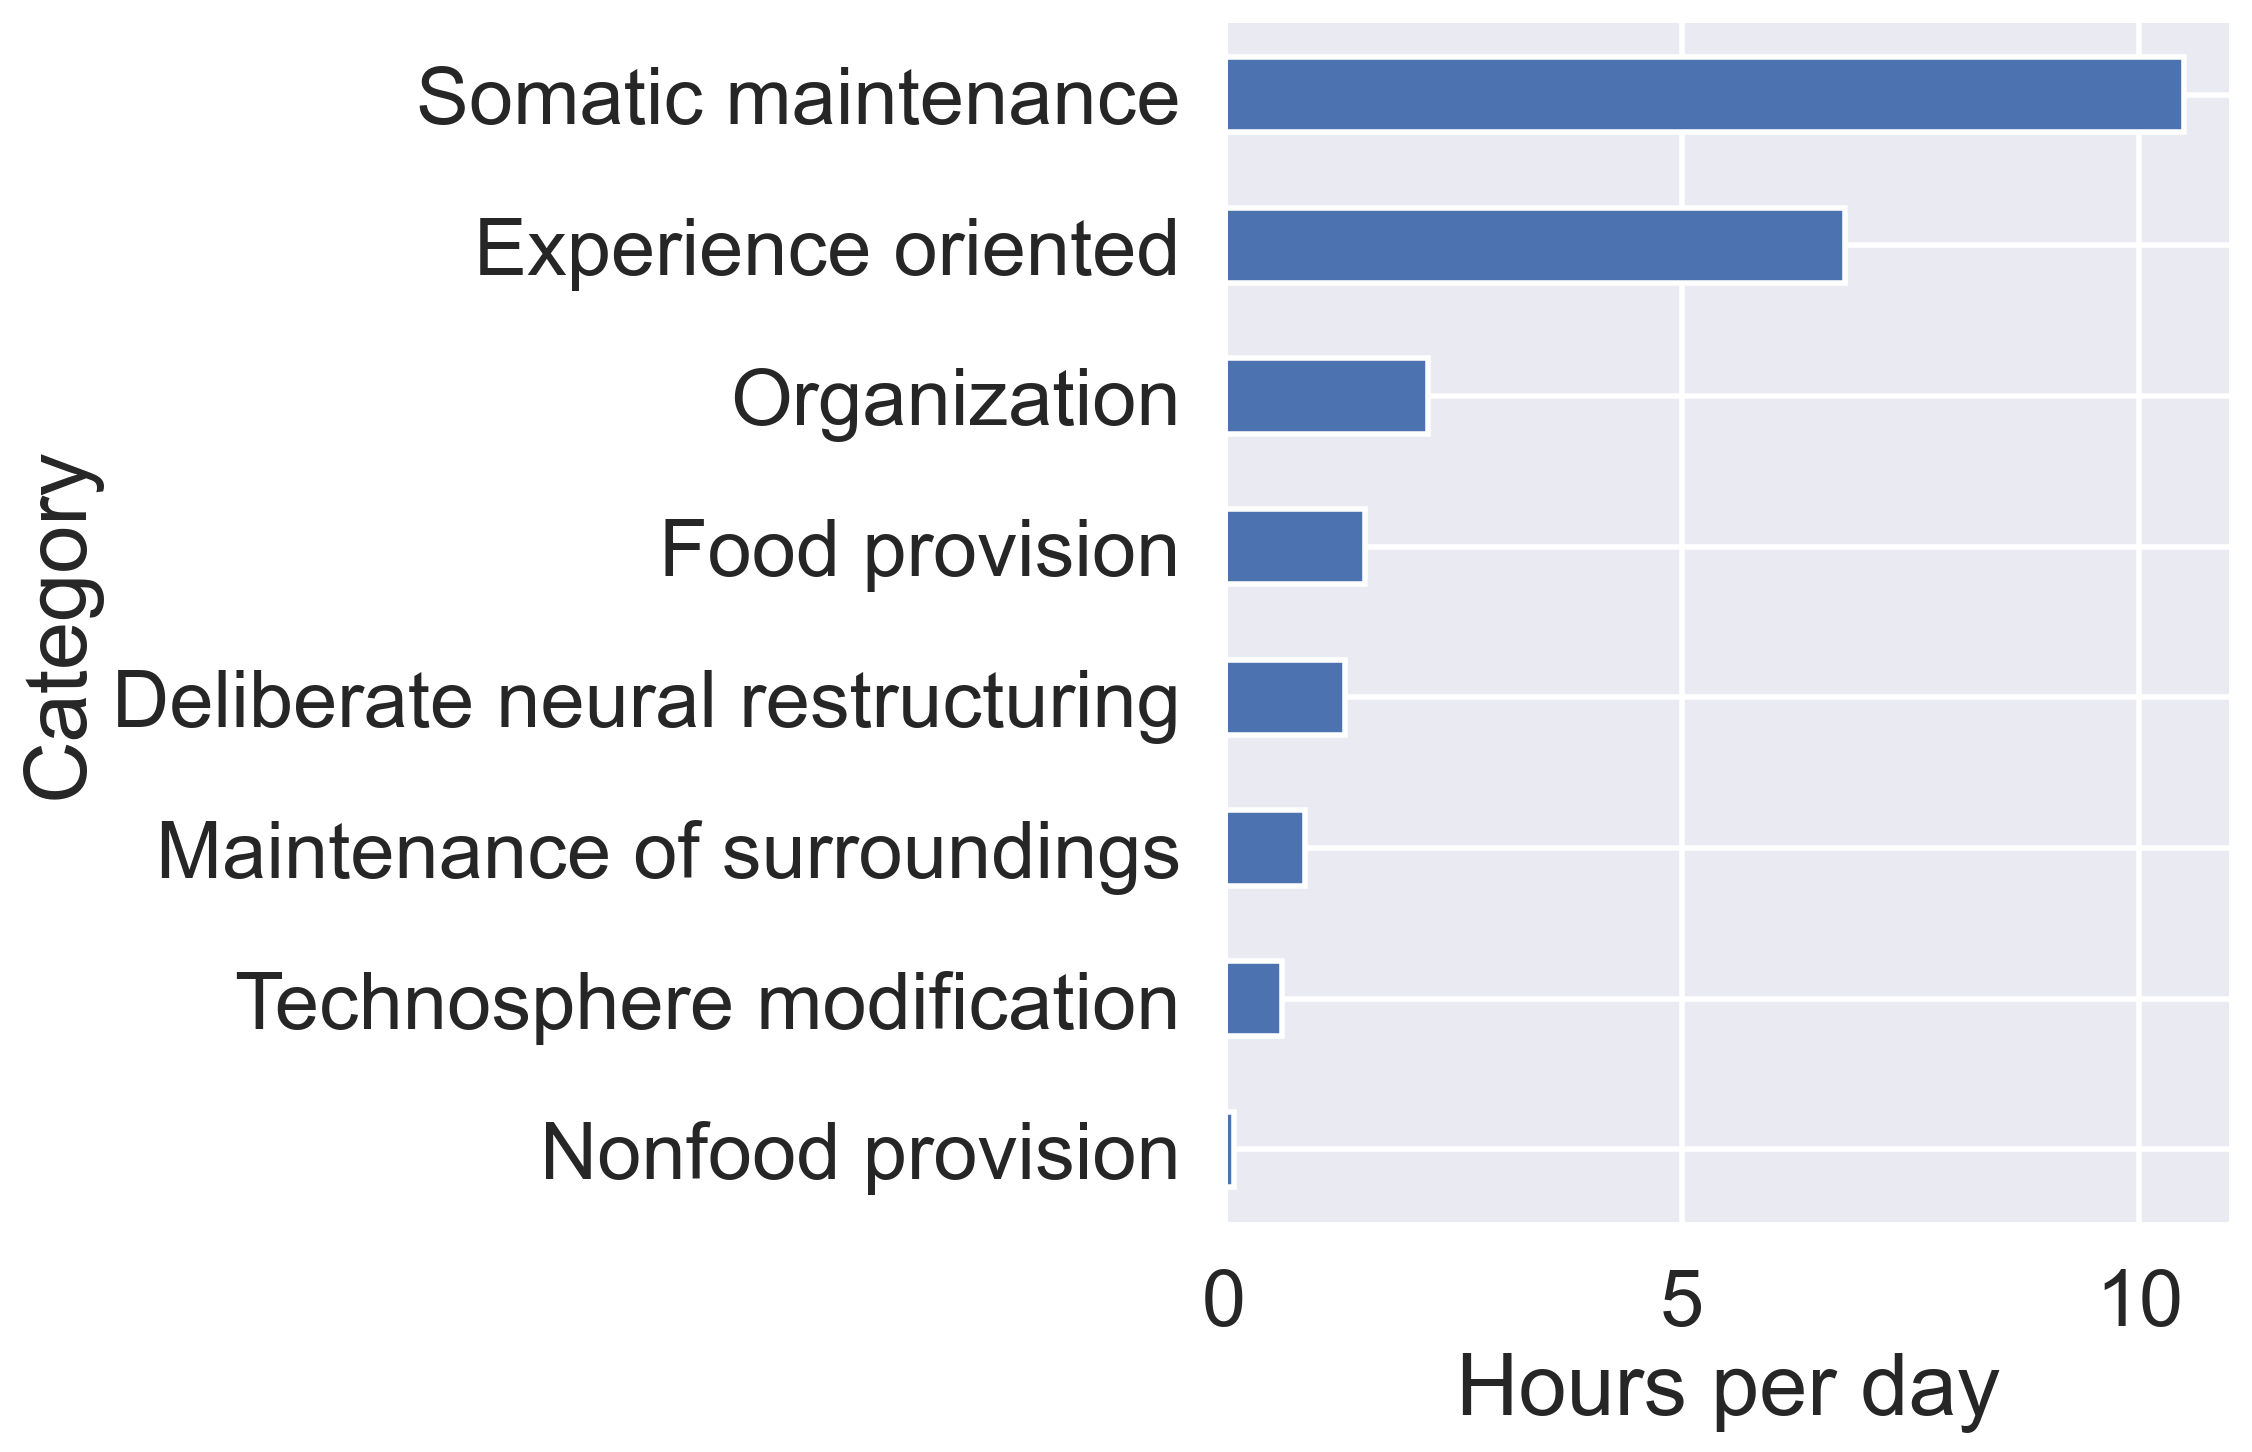

In [ ]:
cat_per_day = all_countries.groupby(['Category'])['hoursPerDayCombined'].sum()
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('w')
(24 * cat_per_day.sort_values()/ cat_per_day.sum()).plot.barh(ax=ax)
ax.set_xlabel("Hours per day")
fig.tight_layout()

In [ ]:
cat_per_day / cat_per_day.sum()

Category
Deliberate neural restructuring    0.0551
Experience oriented                0.2826
Food provision                     0.0642
Maintenance of surroundings        0.0370
Nonfood provision                  0.0047
Organization                       0.0928
Somatic maintenance                0.4373
Technosphere modification          0.0264
Name: hoursPerDayCombined, dtype: float64

## Example notebook usage

In [ ]:
# #| export
# def say_hello(to):
#     "Say hello to somebody"
#     return f'Hello {to}!'

## Misc

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()